# Pinkham Notch Snowpack Data

In [239]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import copy

In [152]:
## Functions for reading in data
def CheckLeap(Year):  
  # Checking if the given year is leap year  
    if((Year % 400 == 0) or  
     (Year % 100 != 0) and  
     (Year % 4 == 0)):   
        return True  
  # Else it is not a leap year  
    else:  
        return False
    
# Python3 implementation of the approach
days = [31, 28, 31, 30, 31, 30,
        31, 31, 30, 31, 30, 31];
 
# Function to return the day number
# of the year for the given date
def dayOfYear(date):
     
    # Extract the year, month and the
    # day from the date string
    year = (int)(date[0:4]);
    month = (int)(date[5:7]);
    day = (int)(date[8:]);
 
    # If current year is a leap year and the date
    # given is after the 28th of February then
    # it must include the 29th February
    if (month > 2 and year % 4 == 0 and
       (year % 100 != 0 or year % 400 == 0)):
        day += 1;
 
    # Add the days in the previous months
    month -= 1;
    while (month > 0):
        day = day + days[month - 1];
        month -= 1;
    return day;

In [9]:
# Pinkham Notch Data
dataPath = '3607611.csv'

In [88]:
# Read in the data
data = pd.read_csv(dataPath)

dates = data.DATE.to_numpy()
snowDepth = data.SNWD.to_numpy()

In [102]:
# Find the indices in the data corresponding to each year (1930-2024)
    # we want to track winter seasons, thus the year will be defined from Sept to Sept
    
def findYearIndices(startYear,endYear,dates):
    # Start and end year correspond to the year in the spring of the winter
    # The first data point is in Jan 1930, so the start year is 1930
    # ex. a start of year of 2001 would start with the winter season of 2000-2001
    # inclusive of endYear
    
    yearRange = np.arange(startYear,endYear+1)
    
    yearIndices = []
    for y in yearRange:
        currYearIndices = []
        for di in range(len(dates)):
            cond1 = float(dates[di][0:4]) == y and int(dates[di][5:7])<9
            cond2 = float(dates[di][0:4]) == y-1 and int(dates[di][5:7])>=9
            if cond1 or cond2:
                currYearIndices = currYearIndices + [di]
        yearIndices = yearIndices + [currYearIndices]
    return yearIndices

indicesByYear = findYearIndices(1930,2024,dates)
yearRange = np.arange(1930,2024+1)

In [200]:
# Select the snow depth in each year

snowDepthByYears = []
datesByWinter = []

for iyear in indicesByYear:
    snowDepthInYear = snowDepth[iyear]
    snowDepthByYears = snowDepthByYears + [snowDepthInYear]
    
    datesByWinter = datesByWinter + [dates[iyear]]
    
# Turn calendar date into day of year (with Sept 1 = day 1)
for iy in range(len(datesByWinter)):
    for iday in range(len(datesByWinter[iy])):
        datesByWinter[iy][iday] = dayOfYear(datesByWinter[iy][iday])+122

        if datesByWinter[iy][iday]>365 and datesByWinter[iy][iday] != datesByWinter[iy][-1]:
            datesByWinter[iy][iday] = datesByWinter[iy][iday]-365

In [327]:
# Calculate the average over the years (1930-2023)

dayAverageSnowDepth = []
for day in range(1,366):
    runningListForMean = []
    for iy in range(len(datesByWinter)-1): # skip 2024
        if day in datesByWinter[iy]:
            # Find the index of that day in datesByWinter[iy]
            indexOfParticularDay = np.nonzero(datesByWinter[iy] == day)[0][0]
            runningListForMean = runningListForMean + [snowDepthByYears[iy][indexOfParticularDay]]
    dayAverageSnowDepth = dayAverageSnowDepth + [np.nanmean(np.array(runningListForMean))]

In [349]:
### Highlight a particular year (give the year in the spring of the winter season) ###
#yearHighlight = input('Enter year')
yearHighlight = 2022

Text(0.5, 1.0, 'Pinkham Notch Snowpack')

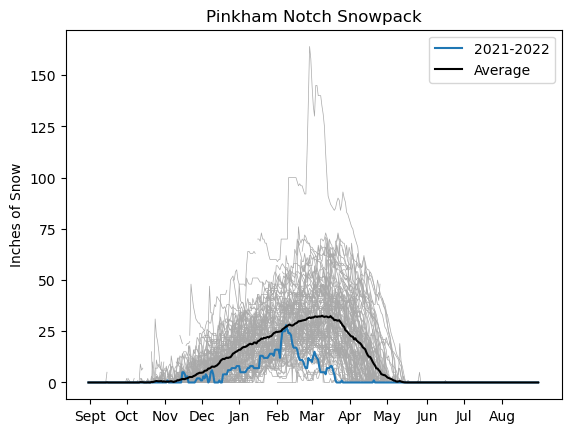

In [350]:
# Put all of these years on a plot
for i in range(len(snowDepthByYears)):
    plt.plot(datesByWinter[i],snowDepthByYears[i],c='darkgray',linewidth = .5)

# Plot highlighted year
indOfHigherYear = np.nonzero(yearRange == yearHighlight)[0][0]
plt.plot(datesByWinter[indOfHigherYear],snowDepthByYears[indOfHigherYear],label = '{}-{}'.format(yearHighlight-1,yearHighlight))

# Plot the average
plt.plot(range(1,366),dayAverageSnowDepth,label='Average',c='k')
plt.legend()

plt.xticks([dayOfYear('2000-09-01')+122-365, dayOfYear('2000-10-01')+122-365,
            dayOfYear('2000-11-01')+122-365, dayOfYear('2000-12-01')+122-365,
            dayOfYear('2001-01-01')+122, dayOfYear('2001-02-01')+122,
            dayOfYear('2001-03-01')+122, dayOfYear('2001-04-01')+122,
            dayOfYear('2001-05-01')+122, dayOfYear('2000-06-01')+122,
            dayOfYear('2000-07-01')+122, dayOfYear('2000-08-01')+122],
           ['Sept','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug']);

plt.ylabel('Inches of Snow')

plt.title('Pinkham Notch Snowpack')

# Other things to look at

Text(0.5, 1.0, 'Peak Snowpack')

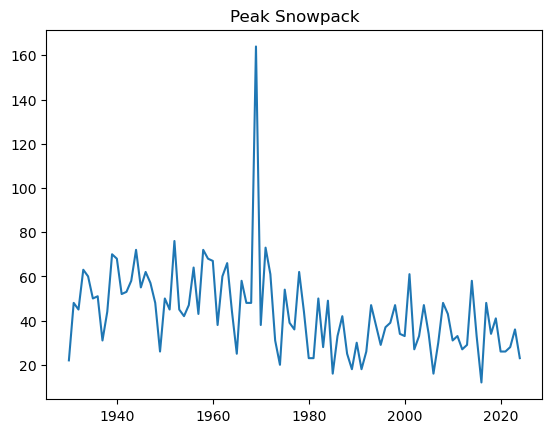

In [347]:
## Look at max snowpack overtime

maxSnowPackByWinter = [np.nanmax(winterSnow) for winterSnow in snowDepthByYears]
plt.plot(yearRange,maxSnowPackByWinter)
plt.title('Peak Snowpack')

Text(0.5, 1.0, 'Date of Max Snowpack')

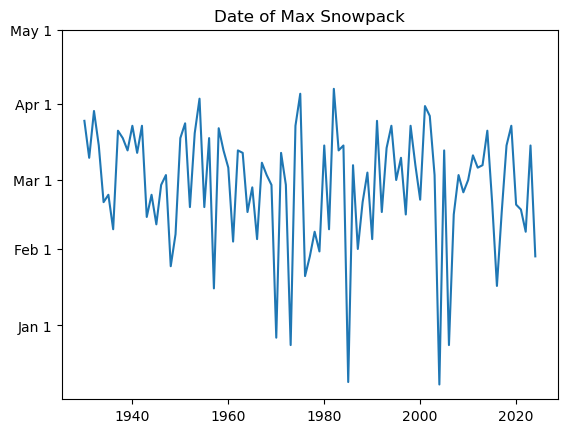

In [348]:
## Look at date of peak snowpack
dateOfPeak = [datesByWinter[i][np.nanargmax(snowDepthByYears[i])] for i in range(len(snowDepthByYears))]
plt.plot(yearRange,dateOfPeak)

plt.yticks([dayOfYear('2001-01-01')+122, dayOfYear('2001-02-01')+122,
            dayOfYear('2001-03-01')+122, dayOfYear('2001-04-01')+122,
            dayOfYear('2001-05-01')+122],
           ['Jan 1','Feb 1','Mar 1','Apr 1','May 1']);

plt.title('Date of Max Snowpack')